In [34]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

plt.rcParams['font.family'] = 'SimHei' #设置字体
plt.rcParams['axes.unicode_minus']=False #坐标轴的负号正常显示

In [35]:
keypoints_2d = []
for i in range(924):
    num_str = str(i).zfill(3)
    path = "./key_points/Motion_000000000%s_keypoints.json"%num_str
    with open(path, 'r') as fp:
        keypoints_2d.append(json.load(fp)['people'][0]['pose_keypoints_2d'])
        
df = pd.DataFrame(keypoints_2d)
# df.to_excel("keypoints.xlsx")

In [36]:
bodyparts = ["鼻子","脖子","右肩","右肘","右腕","左肩","左肘","左腕","右髋","右膝","右踝","左髋","左膝","左踝","右眼","左眼","右耳","左耳"]
column_easy_read = []
for bodypart in enumerate(bodyparts):
    column_easy_read.append(str(bodypart[0])+bodypart[1]+'x')
    column_easy_read.append(str(bodypart[0])+bodypart[1]+'y')
    column_easy_read.append(str(bodypart[0])+bodypart[1]+'conf')
    
df_column_changed = df.copy()
df_column_changed.columns = column_easy_read
df_column_changed

,0鼻子x,0鼻子y,0鼻子conf,1脖子x,1脖子y,1脖子conf,2右肩x,2右肩y,2右肩conf,3右肘x,...,14右眼conf,15左眼x,15左眼y,15左眼conf,16右耳x,16右耳y,16右耳conf,17左耳x,17左耳y,17左耳conf
0,736.243,559.675,0.650311,830.475,515.602,0.626633,836.309,600.905,0.620409,912.859,...,0.745269,715.530,539.065,0.703324,736.274,583.396,0.082676,715.718,486.126,1.025990
1,733.389,556.792,0.595327,827.553,512.621,0.627159,836.289,597.999,0.622575,912.937,...,0.738161,715.528,536.187,0.680843,736.184,583.247,0.081972,715.726,483.256,1.009070
2,736.235,553.823,0.575404,827.588,509.699,0.646545,833.461,597.945,0.623604,912.921,...,0.746082,715.513,530.359,0.690788,736.364,577.481,0.093948,715.664,480.377,0.980916
3,736.290,550.914,0.625083,830.523,506.793,0.636211,833.518,597.979,0.610875,915.866,...,0.799011,715.566,530.218,0.724259,736.248,577.461,0.106643,715.727,480.187,0.997391
4,733.396,547.957,0.612491,827.561,503.877,0.641337,833.523,589.149,0.565578,912.916,...,0.795002,712.804,527.314,0.707544,727.511,577.271,0.093739,715.656,477.347,1.001560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,698.046,400.791,0.443984,806.982,403.669,0.684251,812.881,480.325,0.637592,889.424,...,0.789635,683.350,383.108,0.559931,701.005,456.791,0.297579,692.245,362.443,0.752677
920,695.089,391.957,0.448315,806.954,403.657,0.686810,812.859,480.303,0.634160,892.257,...,0.702814,680.409,380.169,0.509435,701.050,456.781,0.300898,692.210,362.532,0.764218
921,695.023,392.048,0.437441,806.936,403.665,0.674410,812.898,480.331,0.619241,892.305,...,0.704544,677.530,383.130,0.500821,701.085,456.812,0.278024,692.182,362.562,0.811618
922,695.153,397.869,0.422071,806.932,403.691,0.669535,812.879,480.314,0.633211,892.325,...,0.742179,680.409,386.074,0.510983,706.831,459.559,0.266360,692.187,362.624,0.832441


In [37]:
# df_column_changed.to_excel("keypoints(列更名).xlsx")
df_column_changed.columns

Index(['0鼻子x', '0鼻子y', '0鼻子conf', '1脖子x', '1脖子y', '1脖子conf', '2右肩x', '2右肩y',
       '2右肩conf', '3右肘x', '3右肘y', '3右肘conf', '4右腕x', '4右腕y', '4右腕conf', '5左肩x',
       '5左肩y', '5左肩conf', '6左肘x', '6左肘y', '6左肘conf', '7左腕x', '7左腕y', '7左腕conf',
       '8右髋x', '8右髋y', '8右髋conf', '9右膝x', '9右膝y', '9右膝conf', '10右踝x', '10右踝y',
       '10右踝conf', '11左髋x', '11左髋y', '11左髋conf', '12左膝x', '12左膝y', '12左膝conf',
       '13左踝x', '13左踝y', '13左踝conf', '14右眼x', '14右眼y', '14右眼conf', '15左眼x',
       '15左眼y', '15左眼conf', '16右耳x', '16右耳y', '16右耳conf', '17左耳x', '17左耳y',
       '17左耳conf'],
      dtype='object')

In [38]:
# 分别对df的每一列进行三次样条插值（其中为0的元素用插值得到的新值替换）
def fillzero(y):
    CS = CubicSpline(y[y>0].index,y[y>0])
    numzero_id = np.where(y==0)[0]
    y[numzero_id] = CS(numzero_id)

df_fillzero = df.copy()
df_fillzero.apply(fillzero, axis=0)
df_fillzero.to_excel("keypoints(插值).xlsx")

In [39]:
# 对置信度水平排序，位于后5%的点进行三次样条插值（前后各10个点不进行样条插值，因为可能边界会异常）
def dot_fill_low_conf(dot_data):
    dot_data_cp = dot_data.copy()

    low_conf = (dot_data.iloc[:,2].sort_values(ignore_index=True))[int(924*0.05)]

    num_for_subsititute_id = np.where(dot_data.iloc[:,2] <= low_conf)[0]
    normal_id = dot_data.index.drop(num_for_subsititute_id)

    CS_x = CubicSpline(normal_id, dot_data.iloc[:,0][normal_id])
    dot_data.iloc[:,0][num_for_subsititute_id] = CS_x(num_for_subsititute_id)

    CS_y = CubicSpline(normal_id, dot_data.iloc[:,1][normal_id])
    dot_data.iloc[:,1][num_for_subsititute_id] = CS_y(num_for_subsititute_id)
    
    CS_conf = CubicSpline(normal_id, dot_data.iloc[:,2][normal_id])
    dot_data.iloc[:,2][num_for_subsititute_id] = CS_conf(num_for_subsititute_id)

    dot_data.iloc[:10,:] = dot_data_cp.iloc[:10,:]
    dot_data.iloc[-10:,:] = dot_data_cp.iloc[-10:,:]


    # dot_data.iloc[:,0][num_for_subsititute_id] = np.interp(num_for_subsititute_id, normal_id, dot_data.iloc[:,0][normal_id])

    # dot_data.iloc[:,1][num_for_subsititute_id] = np.interp(num_for_subsititute_id, normal_id, dot_data.iloc[:,1][normal_id])
    
    # dot_data.iloc[:,2][num_for_subsititute_id] = np.interp(num_for_subsititute_id, normal_id, dot_data.iloc[:,2][normal_id])

    return dot_data

def fill_low_conf(df):
    for i in range(18):
        df.iloc[:,[3*i,3*i+1,3*i+2]] = dot_fill_low_conf(df.iloc[:,[3*i,3*i+1,3*i+2]])

df_fill_low_conf = df.copy()
fill_low_conf(df_fill_low_conf)
# df_fill_low_conf.to_excel("keypoints(对低置信度插值).xlsx")
df_fill_low_conf

c:\Users\think\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\think\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,736.243,559.675,0.650311,830.475,515.602,0.626633,836.309,600.905,0.620409,912.859,...,0.745269,715.530,539.065,0.703324,736.274,583.396,0.082676,715.718,486.126,1.025990
1,733.389,556.792,0.595327,827.553,512.621,0.627159,836.289,597.999,0.622575,912.937,...,0.738161,715.528,536.187,0.680843,736.184,583.247,0.081972,715.726,483.256,1.009070
2,736.235,553.823,0.575404,827.588,509.699,0.646545,833.461,597.945,0.623604,912.921,...,0.746082,715.513,530.359,0.690788,736.364,577.481,0.093948,715.664,480.377,0.980916
3,736.290,550.914,0.625083,830.523,506.793,0.636211,833.518,597.979,0.610875,915.866,...,0.799011,715.566,530.218,0.724259,736.248,577.461,0.106643,715.727,480.187,0.997391
4,733.396,547.957,0.612491,827.561,503.877,0.641337,833.523,589.149,0.565578,912.916,...,0.795002,712.804,527.314,0.707544,727.511,577.271,0.093739,715.656,477.347,1.001560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,698.046,400.791,0.443984,806.982,403.669,0.684251,812.881,480.325,0.637592,889.424,...,0.789635,683.350,383.108,0.559931,701.005,456.791,0.297579,692.245,362.443,0.752677
920,695.089,391.957,0.448315,806.954,403.657,0.686810,812.859,480.303,0.634160,892.257,...,0.702814,680.409,380.169,0.509435,701.050,456.781,0.300898,692.210,362.532,0.764218
921,695.023,392.048,0.437441,806.936,403.665,0.674410,812.898,480.331,0.619241,892.305,...,0.704544,677.530,383.130,0.500821,701.085,456.812,0.278024,692.182,362.562,0.811618
922,695.153,397.869,0.422071,806.932,403.691,0.669535,812.879,480.314,0.633211,892.325,...,0.742179,680.409,386.074,0.510983,706.831,459.559,0.266360,692.187,362.624,0.832441


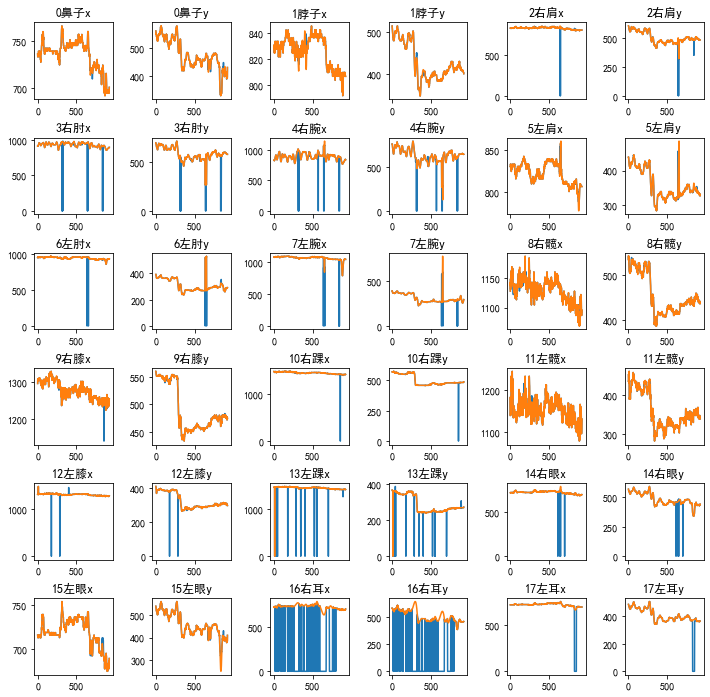

In [40]:
fig,axes = plt.subplots(6,6, figsize=(12,12))
plt.subplots_adjust(wspace=0.5,
                    hspace=0.5
                    )
for i in range(18):
    axes[2*i//6, 2*i%6].title.set_text(df_column_changed.columns[3*i])
    axes[2*i//6, 2*i%6].plot(df[3*i])
    axes[2*i//6, 2*i%6].plot(df_fill_low_conf[3*i])
    axes[2*i//6, 2*i%6+1].title.set_text(df_column_changed.columns[3*i+1])
    axes[2*i//6, 2*i%6+1].plot(df[3*i+1])
    axes[2*i//6, 2*i%6+1].plot(df_fill_low_conf[3*i+1])
plt.show()

In [41]:
# 计算关节之间的2d距离
def cal_joints_lenths_2d(df, joints_id):
    joint0xy = df.loc[:,[joints_id[0]*3, joints_id[0]*3+1]]
    joint1xy = df.loc[:,[joints_id[1]*3, joints_id[1]*3+1]]
    lengths_2d = ((joint0xy.values - joint1xy.values)**2).sum(axis=1)**(1/2)
    return lengths_2d

In [42]:
# 自定义的滑动平均函数, arr是np.array类型, window_size为奇数
def move_average(arr, window_size):
    new_arr = np.convolve(arr, np.ones((window_size,))/window_size, mode='same')
    for i in range(window_size//2):
        new_arr[i] = arr[:2*i+1].sum()/(2*i+1)
        new_arr[len(arr)-1-i] = arr[-2*i-1:].sum()/(2*i+1)
    return new_arr

In [43]:
df_fill_low_conf

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,736.243,559.675,0.650311,830.475,515.602,0.626633,836.309,600.905,0.620409,912.859,...,0.745269,715.530,539.065,0.703324,736.274,583.396,0.082676,715.718,486.126,1.025990
1,733.389,556.792,0.595327,827.553,512.621,0.627159,836.289,597.999,0.622575,912.937,...,0.738161,715.528,536.187,0.680843,736.184,583.247,0.081972,715.726,483.256,1.009070
2,736.235,553.823,0.575404,827.588,509.699,0.646545,833.461,597.945,0.623604,912.921,...,0.746082,715.513,530.359,0.690788,736.364,577.481,0.093948,715.664,480.377,0.980916
3,736.290,550.914,0.625083,830.523,506.793,0.636211,833.518,597.979,0.610875,915.866,...,0.799011,715.566,530.218,0.724259,736.248,577.461,0.106643,715.727,480.187,0.997391
4,733.396,547.957,0.612491,827.561,503.877,0.641337,833.523,589.149,0.565578,912.916,...,0.795002,712.804,527.314,0.707544,727.511,577.271,0.093739,715.656,477.347,1.001560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,698.046,400.791,0.443984,806.982,403.669,0.684251,812.881,480.325,0.637592,889.424,...,0.789635,683.350,383.108,0.559931,701.005,456.791,0.297579,692.245,362.443,0.752677
920,695.089,391.957,0.448315,806.954,403.657,0.686810,812.859,480.303,0.634160,892.257,...,0.702814,680.409,380.169,0.509435,701.050,456.781,0.300898,692.210,362.532,0.764218
921,695.023,392.048,0.437441,806.936,403.665,0.674410,812.898,480.331,0.619241,892.305,...,0.704544,677.530,383.130,0.500821,701.085,456.812,0.278024,692.182,362.562,0.811618
922,695.153,397.869,0.422071,806.932,403.691,0.669535,812.879,480.314,0.633211,892.325,...,0.742179,680.409,386.074,0.510983,706.831,459.559,0.266360,692.187,362.624,0.832441


In [44]:
df_move_average = df_fill_low_conf.copy()
df_move_average = df_move_average.apply(lambda x:move_average(x,5), axis=0)
df_move_average

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,736.2430,559.675000,0.650311,830.475000,515.602000,0.626633,836.309000,600.905000,0.620409,912.859000,...,0.745269,715.530000,539.065000,0.703324,736.2740,583.396000,0.082676,715.718000,486.126000,1.025990
1,735.2890,556.763333,0.607014,828.538667,512.640667,0.633446,835.353000,598.949667,0.622196,912.905667,...,0.743171,715.523667,535.203667,0.691652,736.2740,581.374667,0.086199,715.702667,483.253000,1.005325
2,735.1106,553.832200,0.611723,828.740000,509.718400,0.635577,834.620000,596.795400,0.608608,913.499800,...,0.764705,714.988200,532.628600,0.701352,734.5162,579.771200,0.091796,715.698200,481.458600,1.002985
3,735.1096,552.048600,0.618885,827.570000,507.343200,0.636191,834.060800,593.272800,0.600486,913.523400,...,0.768692,714.991400,530.276400,0.709588,733.3444,578.583600,0.089611,715.679800,479.692200,0.998129
4,735.6820,550.267200,0.641393,826.981800,504.974000,0.636807,833.485400,589.162800,0.594479,914.698600,...,0.769341,714.995600,527.920600,0.727896,733.3630,577.418200,0.084414,715.662800,477.901200,0.997555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,696.8670,401.985400,0.446838,806.959800,403.686200,0.680353,812.883200,480.314600,0.637495,889.977800,...,0.757025,682.178200,388.408000,0.530188,701.6126,456.792200,0.279560,692.203600,362.503600,0.795318
920,696.2680,399.044200,0.438130,806.950800,403.674400,0.680276,812.880000,480.309800,0.633689,891.136400,...,0.743786,681.007000,386.060600,0.521812,702.7744,457.345800,0.276559,692.205000,362.538000,0.796973
921,696.8594,402.571800,0.431666,806.951200,403.099200,0.675592,812.881600,480.311600,0.630882,892.306200,...,0.740047,682.154000,388.421200,0.514864,703.9450,457.914200,0.273283,692.195000,363.098800,0.805334
922,697.0540,406.703667,0.422011,806.940000,402.723333,0.668966,812.889333,480.310000,0.627553,893.283333,...,0.735929,682.337000,392.943000,0.501651,705.8900,458.666333,0.255979,692.173333,363.506333,0.836592


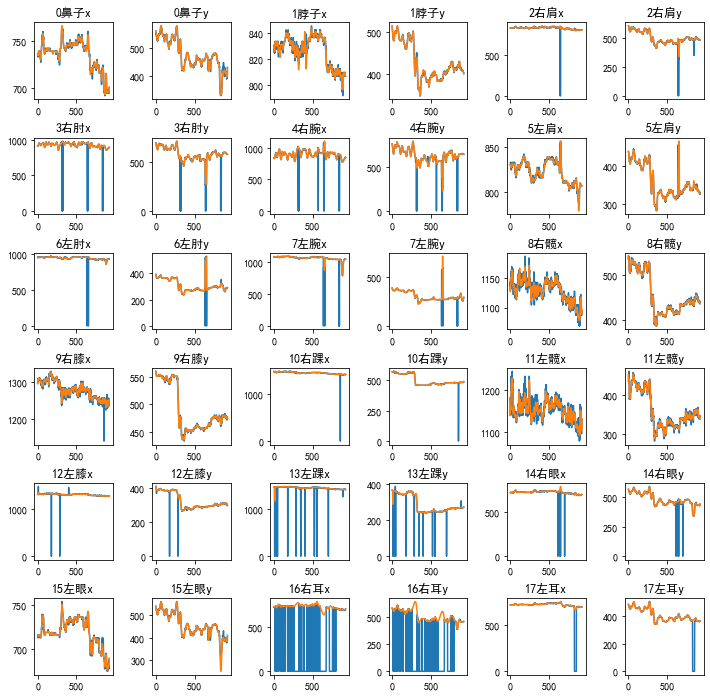

In [45]:
fig,axes = plt.subplots(6,6, figsize=(12,12))
plt.subplots_adjust(wspace=0.5,
                    hspace=0.5
                    )
for i in range(18):
    axes[2*i//6, 2*i%6].title.set_text(df_column_changed.columns[3*i])
    axes[2*i//6, 2*i%6].plot(df[3*i])
    axes[2*i//6, 2*i%6].plot(df_move_average[3*i])
    axes[2*i//6, 2*i%6+1].title.set_text(df_column_changed.columns[3*i+1])
    axes[2*i//6, 2*i%6+1].plot(df[3*i+1])
    axes[2*i//6, 2*i%6+1].plot(df_move_average[3*i+1])
plt.show()

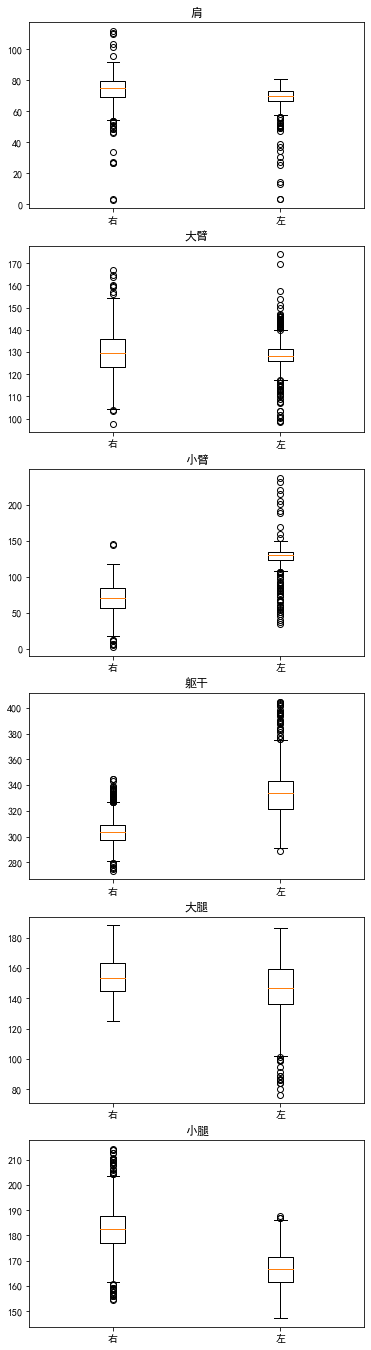

In [46]:
joints_pair = [[[1,2],[1,5]],
                [[2,3],[5,6]],
                [[3,4],[6,7]],
                [[1,8],[1,11]],
                [[8,9],[11,12]],
                [[9,10],[12,13]]]
bone_title = ['肩','大臂','小臂','躯干','大腿','小腿']
fig, axes = plt.subplots(6, 1, figsize=(6,24))
for i in range(6):
    axes[i].set_title(bone_title[i])
    axes[i].boxplot([cal_joints_lenths_2d(df_move_average, joints_pair[i][0]),cal_joints_lenths_2d(df_move_average, joints_pair[i][1])], labels=['右','左'])
plt.show()

In [47]:
def line_plot(dot, joints):
    plt.plot([dot[joints[0]*3], dot[joints[1]*3]], [dot[joints[0]*3+1], dot[joints[1]*3+1]])
def skeleton(dot):
    line_plot(dot, [4,3])
    line_plot(dot, [3,2])
    line_plot(dot, [2,1])
    line_plot(dot, [1,5])
    line_plot(dot, [5,6])
    line_plot(dot, [6,7])
    line_plot(dot, [1,8])
    line_plot(dot, [1,11])
    line_plot(dot, [8,9])
    line_plot(dot, [9,10])
    line_plot(dot, [11,12])
    line_plot(dot, [12,13])
    line_plot(dot, [16,14])
    line_plot(dot, [14,0])
    line_plot(dot, [0,15])
    line_plot(dot, [0,1])
    line_plot(dot, [15,17])
    plt.show()

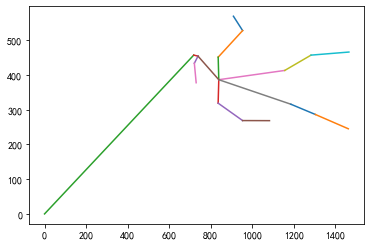

In [48]:
dot = df.iloc[600]
skeleton(dot)

In [49]:
def dot_plot(dot):
    plt.scatter(dot[[i*3 for i in range(18)]], dot[[i*3+1 for i in range(18)]])
    plt.show()

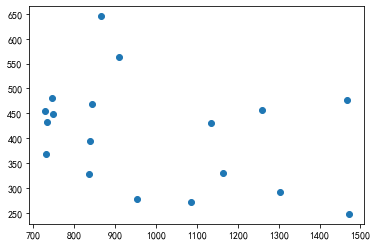

In [50]:
dot = np.array([748.067,447.898,0.617716,839.301,394.937,0.672854,842.297,468.471,0.598869,909.962,562.667,0.786386,865.794,644.982,0.854478,836.414,327.176,0.675421,954.08,277.205,0.74237,1086.55,271.234,0.907058,1133.62,430.159,0.385922,1260.24,456.737,0.620769,1466.26,477.235,0.695866,1163.08,330.178,0.223889,1304.34,291.722,0.668186,1472.17,247.779,0.663606,727.555,453.713,0.650136,733.343,433.02,0.718834,745.237,480.146,0.0668634,730.433,368.473,0.901935])
dot_plot(dot)

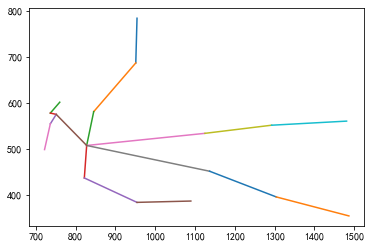

In [51]:
dot = df.iloc[62]
skeleton(dot)

In [52]:
def line_plot(dot, joints):
    plt.plot([dot[joints[0]*3+1], dot[joints[1]*3+1]], [dot[joints[0]*3], dot[joints[1]*3]])
def skeleton(dot):
    line_plot(dot, [4,3])
    line_plot(dot, [3,2])
    line_plot(dot, [2,1])
    line_plot(dot, [1,5])
    line_plot(dot, [5,6])
    line_plot(dot, [6,7])
    line_plot(dot, [1,8])
    line_plot(dot, [1,11])
    line_plot(dot, [8,9])
    line_plot(dot, [9,10])
    line_plot(dot, [11,12])
    line_plot(dot, [12,13])
    line_plot(dot, [16,14])
    line_plot(dot, [14,0])
    line_plot(dot, [0,15])
    line_plot(dot, [0,1])
    line_plot(dot, [15,17])
    plt.show()

In [65]:
# 计算关节之间的2d距离
def cal_joints_lenths_2d(df, joints_id):
    joint0xy = df.loc[:,[joints_id[0]*3, joints_id[0]*3+1]]
    joint1xy = df.loc[:,[joints_id[1]*3, joints_id[1]*3+1]]
    lengths_2d = ((joint0xy.values - joint1xy.values)**2).sum(axis=1)**(1/2)
    return lengths_2d

Shoulder_list = cal_joints_lenths_2d(df_move_average, [1,5])
UpperArm_list = cal_joints_lenths_2d(df_move_average, [5,6])
LowerArm_list = cal_joints_lenths_2d(df_move_average, [6,7])
Shoulder_Length = Shoulder_list[:24].mean()
UpperArm_Length = UpperArm_list[:24].mean()
LowerArm_Length = LowerArm_list[:24].mean()
depth_Shoulder = (abs(Shoulder_list**2-Shoulder_Length**2))**0.5
depth_UpperArm = (abs(UpperArm_list**2-UpperArm_Length**2))**0.5
depth_LowerArm = (abs(LowerArm_list**2-LowerArm_Length**2))**0.5


array([ 28.32073743,  22.49093565,  25.24101767,  19.09034242,
        14.67178819,   9.73174518,  18.87570806,  26.47485869,
        25.03105597,  20.5846177 ,  12.97890148,  15.80769575,
        10.32205753,  15.4875641 ,  19.53655896,  20.22090383,
        12.8298066 ,  10.43915091,  11.63212385,  13.78882264,
        13.79644074,  14.11736684,  17.28516135,  20.95300832,
        26.74265958,  25.74365972,  24.68524947,  21.15664407,
        14.32135918,  12.18441764,   6.22474043,   9.12778795,
        11.95142011,  14.15597304,  21.32081554,  19.89741088,
        19.69729073,  15.68809049,  15.60981796,  13.50616841,
        13.42150109,   6.87907986,  11.19237031,   3.65493028,
         4.48752753,  12.78165861,  21.16455703,  24.26713079,
        29.16559755,  31.52799694,  31.59915614,  30.73536833,
        29.9085271 ,  27.40295456,  29.42461184,  34.84042723,
        37.68070037,  42.86930979,  47.87605325,  50.38750952,
        51.8575004 ,  54.68669127,  56.09143957,  58.08

C:\Users\think\AppData\Local\Temp\ipykernel_1292\2819857275.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(UpperArm_list**2-UpperArmLength**2)


array([         nan,          nan,          nan,          nan,
                nan,   9.73174518,  18.87570806,  26.47485869,
        25.03105597,  20.5846177 ,  12.97890148,  15.80769575,
        10.32205753,  15.4875641 ,  19.53655896,  20.22090383,
        12.8298066 ,  10.43915091,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,   9.12778795,
        11.95142011,  14.15597304,  21.32081554,  19.89741088,
        19.69729073,  15.68809049,  15.60981796,  13.50616841,
        13.42150109,   6.87907986,  11.19237031,   3.65493028,
         4.48752753,  12.78165861,  21.16455703,  24.26713079,
        29.16559755,  31.52799694,  31.59915614,  30.73536833,
        29.9085271 ,  27.40295456,  29.42461184,  34.84042723,
        37.68070037,  42.86930979,  47.87605325,  50.38750952,
        51.8575004 ,  54.68669127,  56.09143957,  58.08